In [1]:
import matplotlib.pyplot as plt
import os
from scipy.io import wavfile
from collections import defaultdict, Counter
from scipy import signal
import numpy as np
import librosa
import sklearn
from keras.utils import to_categorical
import random
from unicodedata import normalize
import tensorflow as tf
from keras import models, layers
from keras.layers import BatchNormalization, Activation, Dropout
from sklearn.preprocessing import LabelEncoder
from PIL import Image
import glob
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [2]:
# 데이터 경로
train_img_path = "c:/Users/Desk_Kang/Desktop/Aiffel/workplace/lib/Aiffelthon/data3img/train"
test_img_path = "c:/Users/Desk_Kang/Desktop/Aiffel/workplace/lib/Aiffelthon/data3img/test"

In [3]:
# 클래스마다 라벨 부여
class_labels = {'belly_pain' : 0, 'discomfort' : 1, 'hungry' : 2, 'tired' : 3}

In [4]:
#라벨 인코더
le = LabelEncoder()

In [5]:
#데이터, 라벨 리스트
train_data = []
train_labels = []
test_data = []
test_labels = []

In [6]:
# train 데이터 폴더 접근
for class_name, label in class_labels.items():
    class_path = os.path.join(train_img_path, class_name)

    #폴더 내의 각 이미지 파일 처리
    for filename in os.listdir(class_path):
        if filename.endswith(".png"):
            img_path = os.path.join(class_path, filename)
            img = load_img(img_path, target_size=(224, 224, 3))
            img_array = img_to_array(img)
            train_data.append(img_array)
            train_labels.append(label)


In [7]:
#test 폴더 접근
for class_name, label in class_labels.items():
    class_path = os.path.join(test_img_path, class_name)

    #폴더 내의 각 이미지 파일 처리
    for filename in os.listdir(class_path):
        if filename.endswith(".png"):
            img_path = os.path.join(class_path, filename)
            img = load_img(img_path, target_size=(224, 224, 3))
            img_array = img_to_array(img)
            test_data.append(img_array)
            test_labels.append(label)

In [8]:
# def load_data(img_path, number_of_data=204):
    
#     img_size = 224
#     color = 3

#     train_data = np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
#     train_labels=np.zeros(number_of_data,dtype=np.int32)

#     idx=0
#     for file in glob.iglob(img_path+'/belly_pain/*.png'):
#         img = np.array(Image.open(file),dtype=np.int32)
#         train_data[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
#         train_labels[idx]=0   # belly_pain : 0
#         idx=idx+1

#     for file in glob.iglob(img_path+'/discomfort/*.png'):
#         img = np.array(Image.open(file),dtype=np.int32)
#         train_data[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
#         train_labels[idx]=1   # discomfort : 1
#         idx=idx+1  
    
#     for file in glob.iglob(img_path+'/hungry/*.png'):
#         img = np.array(Image.open(file),dtype=np.int32)
#         train_data[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
#         train_labels[idx]=2   # hungry : 2
#         idx=idx+1

#     for file in glob.iglob(img_path+'/tired/*.png'):
#         img = np.array(Image.open(file),dtype=np.int32)
#         train_data[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
#         train_labels[idx]=3   # tired : 3
#         idx=idx+1
        
#     print("학습데이터(X)의 이미지 개수는", idx,"입니다.")
#     return train_data, train_data

In [9]:
# (X, y) = load_data(train_img_path)

In [10]:
#데이터, 라벨 np 배열 변환
train_data = np.array(train_data)
train_labels = np.array(train_labels)
test_data = np.array(test_data)
test_labels = np.array(test_labels)

In [30]:
train_le = le.fit_transform(train_labels)
test_le = le.fit_transform(test_labels)

In [11]:
train_data_norm = train_data / 255
test_data_norm = test_data / 255

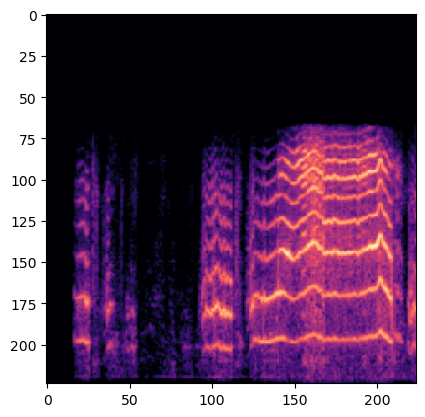

In [13]:
plt.imshow(train_data_norm[0])

In [33]:
print(test_data_norm.shape)
print(train_data_norm.shape)
print(len(test_labels))
print(len(train_labels))

(40, 224, 224, 3)
(204, 224, 224, 3)
40
204


In [25]:
from tensorflow.keras.applications import VGG16

In [29]:
#pre_trained 

base_model = tf.keras.applications.VGG16(weights='imagenet',include_top=False, input_shape=(224,224,3))

input_layer = tf.keras.layers.Input((224,224,3))

# 새로운 분류 레이어 추가
x = base_model(input_layer)


x=tf.keras.layers.Flatten()(x)
x=tf.keras.layers.Dense(1024, activation='relu')(x)
x=tf.keras.layers.Dense(512, activation='relu')(x)
out_layer=tf.keras.layers.Dense(4, activation='softmax')(x)

model = tf.keras.Model(inputs=[input_layer], outputs=[out_layer])
model.summary()

58889256/58889256 [==============================] - 3s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 1024)              25691136  
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 4)                 2052      
                                                              

In [30]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [34]:
history = model.fit(train_data_norm, train_labels, epochs=45, validation_data = (test_data_norm, test_labels))

Epoch 1/45
7/7 [==============================] - 20s 1s/step - loss: 8.3927 - accuracy: 0.3186 - val_loss: 1.7517 - val_accuracy: 0.2500
Epoch 2/45
7/7 [==============================] - 2s 258ms/step - loss: 1.2255 - accuracy: 0.4167 - val_loss: 1.4135 - val_accuracy: 0.2500
Epoch 3/45
7/7 [==============================] - 2s 258ms/step - loss: 1.2776 - accuracy: 0.4069 - val_loss: 1.8739 - val_accuracy: 0.2500
Epoch 4/45
7/7 [==============================] - 2s 265ms/step - loss: 1.2338 - accuracy: 0.4412 - val_loss: 1.4451 - val_accuracy: 0.2500
Epoch 5/45
7/7 [==============================] - 2s 257ms/step - loss: 1.1832 - accuracy: 0.4902 - val_loss: 1.6512 - val_accuracy: 0.2500
Epoch 6/45
7/7 [==============================] - 2s 258ms/step - loss: 1.2380 - accuracy: 0.3284 - val_loss: 1.4165 - val_accuracy: 0.2500
Epoch 7/45
7/7 [==============================] - 2s 264ms/step - loss: 1.2177 - accuracy: 0.4951 - val_loss: 1.7022 - val_accuracy: 0.2500
Epoch 8/45
7/7 [======

C:\Users\Desk_Kang\AppData\Local\Temp\ipykernel_4052\237002889.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


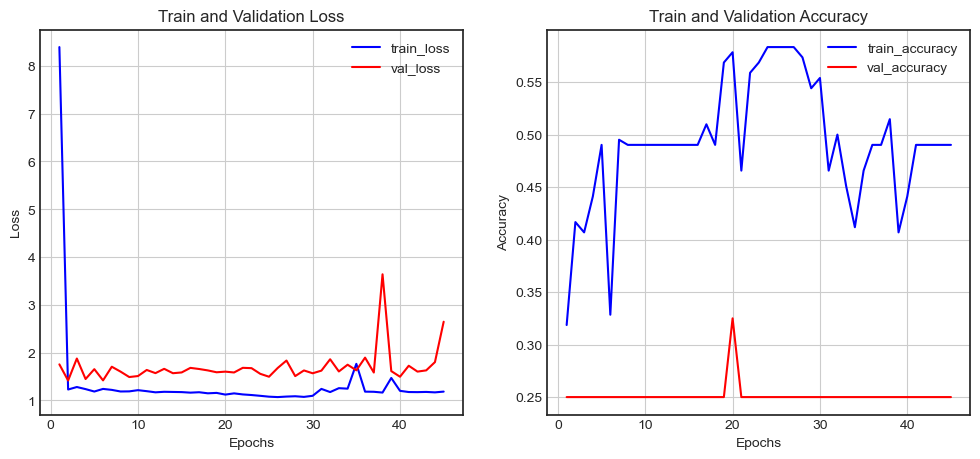

In [35]:
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()